In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
#calculate the anomalies, use the data minus the mean data
group_data = ds.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
sst_anom

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-4.99606133e-04, -4.80890274e-04, -2.60949135e-04, ...,
         -6.23464584e-05, -1.96099281e-04, -2.56419182e-04],
        [ 8.34465027e-07,  8.34465027e-07, -3.20672989e-05, ...,
          8.34465027e-07, -1.93119049e-05, -1.23977661e-05],
        [ 8.34465027e-07,  8.34465027e-07,  8.34465027e-07, ...,
          8.34465027e-07,  8.34465027e-07,  8.34465027e-07]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          7.20262527e-04,  1.48342848e-02,  3.37822437e-02],
        [ 8.60170126e-02,  1.03921890e-01,  1.17389798e-01, ...,
          3.52077484e-02,  5.62392473e-02,  7.08031654e-02],
        [ 4.64653969e-02,  5.28458357e-02,  5.65373898e-02, ...,
          3.26167345e-02,  3.87690067e-02,  4.36384678e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 5.52459955e-02,  6.29582405e-02,  6.44934177e-02, ...,
          1.50566101e-02,  3.07782888e-02,  4.51773405e-02],
        [ 4.06903028e-02,  4.51246500e-02,  4.60950136e-02, ...,
          2.47172117e-02,  3.07500362e-02,  3.64114046e-02],
        [ 2.26362944e-02,  2.52594948e-02,  2.62612104e-02, ...,
          1.57128572e-02,  1.88019276e-02,  2.13360786e-02]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [5]:
#rolling mean is the method to calculate the 3 months rolling average data, it's like 123, 234, 345 and so on
ds_anom_rolling = sst_anom.rolling(time=3, center=True).mean()
ds_anom_rolling

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          5.24004316e-03,  1.51618719e-02,  2.62249317e-02],
        [ 4.22303677e-02,  4.96788844e-02,  5.51667623e-02, ...,
          1.99752655e-02,  2.89956741e-02,  3.57356891e-02],
        [ 2.30340958e-02,  2.60350313e-02,  2.75989771e-02, ...,
          1.63543224e-02,  1.94383860e-02,  2.16955356e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [6]:
#select the region and get the mean value
region=ds_anom_rolling.sel(lon=slice(190, 240), lat=slice(-5, 5),time=slice('2000','2020'))
sst_mean=region.mean(dim=['lat', 'lon'])
sst_mean

<xarray.DataArray 'sst' (time: 204)>
array([-1.60169697e+00, -1.37193680e+00, -1.04292583e+00, -7.76382387e-01,
       -6.68948948e-01, -6.07266843e-01, -4.98296589e-01, -4.27006602e-01,
       -4.58490461e-01, -5.65837264e-01, -6.86091542e-01, -6.96292937e-01,
       -6.28138483e-01, -4.80162650e-01, -3.67843091e-01, -2.37380043e-01,
       -1.23212554e-01,  3.28468159e-02,  1.07207537e-01,  1.06165044e-01,
        3.09820548e-02, -8.61788169e-02, -1.82177037e-01, -1.88562512e-01,
       -8.44062269e-02,  9.43591446e-02,  2.20868096e-01,  4.01784599e-01,
        6.09885335e-01,  7.81805217e-01,  8.44704688e-01,  8.82737994e-01,
        1.01208282e+00,  1.21437287e+00,  1.37397897e+00,  1.34145105e+00,
        1.16181409e+00,  8.74624848e-01,  5.22637844e-01,  1.01510234e-01,
       -1.11355521e-01,  2.48836298e-02,  3.16654027e-01,  4.48199451e-01,
        4.96135414e-01,  4.76588160e-01,  5.06069005e-01,  4.21535492e-01,
        3.82412046e-01,  2.89514035e-01,  2.47030169e-01,  2.15110138e-01,
        2.70377070e-01,  4.14508998e-01,  6.15414798e-01,  7.83270538e-01,
        8.38541806e-01,  7.91558504e-01,  7.71637797e-01,  7.44952440e-01,
        6.59792006e-01,  5.32313585e-01,  3.94324362e-01,  4.15190756e-01,
        4.10966337e-01,  3.83329600e-01,  3.12190622e-01,  2.02537999e-01,
        1.17771707e-01, -1.67115644e-01, -4.58339572e-01, -7.53956974e-01,
       -7.57106125e-01, -6.24588370e-01, -3.73590916e-01, -1.39057890e-01,
        7.88187087e-02,  1.85032874e-01,  2.91722625e-01,  4.12212074e-01,
...
       -1.36052823e+00, -1.42086625e+00, -1.39447236e+00, -1.39999533e+00,
       -1.29381716e+00, -1.12894547e+00, -8.00049424e-01, -4.95401353e-01,
       -1.95671916e-01, -7.09553286e-02, -1.23575971e-01, -3.31627548e-01,
       -5.43009937e-01, -7.74967730e-01, -9.15227175e-01, -9.00123179e-01,
       -7.56498337e-01, -5.23007095e-01, -3.39979976e-01, -1.79406539e-01,
       -5.35964072e-02,  5.45679405e-02,  2.09609374e-01,  4.63138252e-01,
        6.14878237e-01,  6.54001176e-01,  2.47433737e-01, -1.93644047e-01,
       -5.42674124e-01, -5.37452638e-01, -2.73814023e-01, -1.03850834e-01,
       -5.96894324e-02, -1.80341557e-01, -2.66226739e-01, -2.59480625e-01,
       -1.97789744e-01, -1.51552990e-01, -2.10533813e-01, -3.62679362e-01,
       -5.33728540e-01, -5.30208886e-01, -3.43386948e-01,  1.87203521e-03,
        1.98364228e-01,  2.20234156e-01,  9.81737003e-02,  1.13682605e-01,
        2.57233649e-01,  5.44580996e-01,  7.00828791e-01,  7.35657215e-01,
        6.30336583e-01,  5.86939633e-01,  6.80745661e-01,  8.33929539e-01,
        1.01701725e+00,  1.18350756e+00,  1.40075278e+00,  1.65811932e+00,
        1.96469998e+00,  2.31362391e+00,  2.51594186e+00,  2.56193399e+00,
        2.37545586e+00,  2.07421207e+00,  1.63727725e+00,  1.07768452e+00,
        5.00944257e-01, -7.18474463e-02, -4.42458987e-01, -6.18387520e-01,
       -7.28147447e-01, -8.35824132e-01, -9.07570124e-01,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [7]:
#I select the positive and negetive time and divide into two parts, minus and plus
sample_plus = region.where(region >= 0).mean(dim=['lat', 'lon'])
sample_minus = region.where(region < 0).mean(dim=['lat', 'lon'])
time = ds['time'].sel(time=slice('2000','2020'))
time

<xarray.DataArray 'time' (time: 204)>
array(['2000-01-15T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', ..., '2016-10-15T00:00:00.000000000',
       '2016-11-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2016-12-15

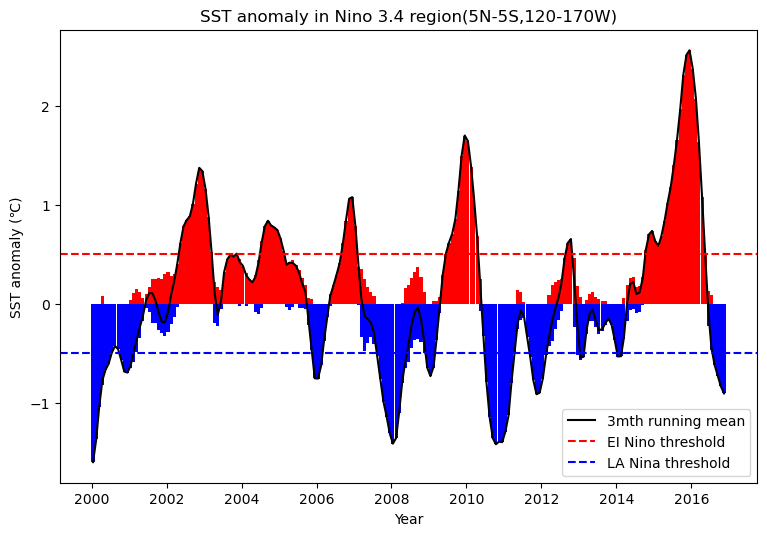

In [9]:
#plot the figure, first plot the anomaly line in black
plt.figure(figsize=(9,6), dpi=100)
plt.plot(time,sst_mean,color='k',label='3mth running mean')
color1=['red']
color2=['blue']
#plot the bar of minus and plus time in blue and red
plt.bar(time,sample_plus,width=30.0, bottom=0,color=color1)
plt.bar(time,sample_minus,width=30.0, bottom=0,color=color2)
#due to the 0.5 is the threshold of the LA NIno and EL Nino, plot them on
plt.axhline(0.5,color='r',linestyle='dashed',label='EI Nino threshold')
plt.axhline(-0.5,color='b',linestyle='dashed',label='LA Nina threshold')
plt.title('SST anomaly in Nino 3.4 region(5N-5S,120-170W)') 
plt.ylabel('SST anomaly (℃)')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()